In [1]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import sys
from scipy.interpolate import griddata
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from fio import readin

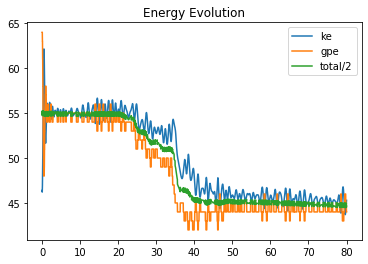

In [5]:
path = '/home/jiarong/research/projects/multilayer/testing/multigrid_changeheader/trial25/P0005N5_CFL01/'
energy,exists = readin(path+'energy.dat', table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'])
if exists:
    total = energy.ke + energy.gpe + 306250
#     diss = np.zeros(energy.shape[0])
#     for i, row in energy.iterrows():
#         if i == 0:
#             diss[i] = 0
#             last_t = row['t'] # record t in last row
#         else:
#             diss[i] = diss[i-1] + row['dissipation'] * (row['t'] - last_t)
#             last_t = row['t']
energy.insert(len(energy.columns), "total", total, True)
# energy.insert(len(energy.columns), "total_diss", total+diss, True)
# NS solver
plt.plot(energy.t, energy.ke, label='ke')
plt.plot(energy.t, energy.gpe+306250, label='gpe')
plt.plot(energy.t, energy.total/2, label='total/2')

'''
    Get potential energy by looking at eta squared.
'''
# file_common = path + 'surface/eta_matrix_'
# F_center_list = []; F_k_list = []; aver = [];
# gpe = []
# N = 256
# t = np.arange(0,50,0.1)
# for i in range(0,500):    
#     pfile = file_common + '%g' % (i/10.)
#     eta = np.fromfile(pfile, dtype=np.float32)
#     eta = eta.reshape(N+1,N+1)
#     eta = eta[1:,1:]
#     gpe.append(np.sum((eta-np.average(eta))**2))
# gpe_int = np.array(gpe)*(50/N)**2*9.8*1/2
# plt.plot(t, gpe_int, label = 'gpe from eta')
plt.title("Energy Evolution"); plt.legend()

In [219]:
from matplotlib import rc
# text and font
## small, medium, large, x-large, xx-large, larger, or smaller
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 'small'
# Figure size
plt.rcParams['figure.figsize'] = 8, 4.8 ## figure size in inches
plt.rcParams['figure.dpi'] = 1200        ## figure dots per inchfigsize : 6.4, 4.8
# Line
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
# Ticks
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['xtick.major.size'] = 3.5

In [ ]:
path = '/home/jiarong/research/projects/multilayer/testing/'
energy,exists = readin(path+'budget.dat', table_delimiter = ' ', table_headers =['t','ke','gpe'])
if exists:
    total = energy.ke + energy.gpe + 0.125
#     diss = np.zeros(energy.shape[0])
#     for i, row in energy.iterrows():
#         if i == 0:
#             diss[i] = 0
#             last_t = row['t'] # record t in last row
#         else:
#             diss[i] = diss[i-1] + row['dissipation'] * (row['t'] - last_t)
#             last_t = row['t']
energy.insert(len(energy.columns), "total", total, True)
# energy.insert(len(energy.columns), "total_diss", total+diss, True)
plt.plot(energy.t, energy.ke, label='ke')
plt.plot(energy.t, energy.gpe+0.125, label='gpe')
plt.plot(energy.t, energy.total/2, label='total/2')
# plt.plot(energy.t, diss, label='dissipation')
# plt.plot(energy.t, energy.total_diss/2, label='total/2+diss/2')
plt.title("3D ML solver, ak=0.35"); plt.legend()
plt.title("ML, ak=0.33, nl=120, N=256")
ax = plt.gca()
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))
plt.xlim([0,1.4])
# ax.yaxis.major.formatter._useMathText = True
# plt.ticklabel_format(axis="y", style="sci", scilimits=(-3,-3))

In [10]:
(262144/4)**0.5

256.0

Text(0.5, 1.0, 'run output at t=10')

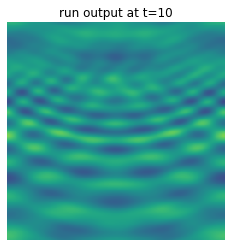

In [159]:
pfile = '/home/jiarong/research/projects/multilayer/testing/multigrid_changeheader/trial25/pre/eta'
u = np.fromfile(pfile, dtype=np.float32)
N = 256
u = u.reshape(N+1,N+1)
# Why delete first grid?
u = u[1:,1:]
image = np.rot90(u)
plt.imshow(image, vmax=0.4, vmin=-0.4)
plt.axis('off')
# grid[0].cax.colorbar(pcontour)
# grid[0].axis('off')
plt.title('run output at t=10')

Text(0, 0.5, 'eta')

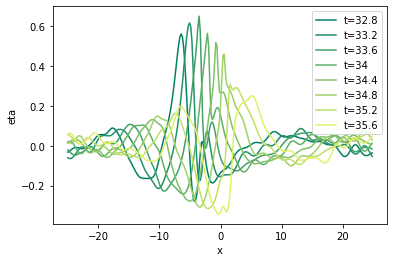

In [145]:
path = '/home/jiarong/research/projects/multilayer/testing/multigrid_changeheader/trial24/P0015_CFL01/'
x = np.arange(-25,25,50/256)
t = np.arange(32.8,35.6,0.4)
for i in range(t.size):
    eta = np.fromfile(path+'surface/eta_matrix_%g' %t[i], dtype=np.float32)
    N = 256
    eta = eta.reshape(N+1,N+1); eta= eta[1:,1:]
    plt.plot(x, eta[:,127], label='t=%g' %t[i], color=plt.cm.get_cmap('summer')(i/t.size))
plt.legend(loc='upper right')
plt.xlabel('x'); plt.ylabel('eta')

In [156]:
66564**0.5

258.0